In [20]:
import pandas as pd
import numpy as np

In [21]:
data = {'Date' : pd.date_range(start='2023-01-01', periods=200, freq='D'), 
        'Time' : ['14:00'] * 200,
        'Population' : np.random.randint(48000, 52000, size=200),
        'DayOfWeek' : pd.date_range(start='2023-01-01', periods=200, freq='D').day_name(),
        'Holiday' : np.random.choice(['Yes', 'No'], size=200),
        'Weather' : np.random.choice(['Sunny', 'Rainy', 'Cloudy'], size=200),
        'Temperature' : np.random.randint(15, 25, size=200),
        'SpecialEvent' : np.random.choice(['Yes', 'No'], size=200)}
df = pd.DataFrame(data)

In [22]:
df.head(3)

,Date,Time,Population,DayOfWeek,Holiday,Weather,Temperature,SpecialEvent
0,2023-01-01,14:00,50793,Sunday,Yes,Sunny,16,No
1,2023-01-02,14:00,49774,Monday,No,Sunny,17,No
2,2023-01-03,14:00,50939,Tuesday,Yes,Sunny,19,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          200 non-null    datetime64[ns]
 1   Time          200 non-null    object        
 2   Population    200 non-null    int32         
 3   DayOfWeek     200 non-null    object        
 4   Holiday       200 non-null    object        
 5   Weather       200 non-null    object        
 6   Temperature   200 non-null    int32         
 7   SpecialEvent  200 non-null    object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 11.1+ KB


In [24]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [25]:
df = pd.get_dummies(df, columns=['DayOfWeek', 'Holiday', 'Weather', 'SpecialEvent'])

In [26]:
df.head(7)

,Population,Temperature,DateTime,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_No,Holiday_Yes,Weather_Cloudy,Weather_Rainy,Weather_Sunny,SpecialEvent_No,SpecialEvent_Yes
0,50793,16,2023-01-01 14:00:00,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,49774,17,2023-01-02 14:00:00,False,True,False,False,False,False,False,True,False,False,False,True,True,False
2,50939,19,2023-01-03 14:00:00,False,False,False,False,False,True,False,False,True,False,False,True,True,False
3,49533,17,2023-01-04 14:00:00,False,False,False,False,False,False,True,True,False,False,False,True,False,True
4,51137,23,2023-01-05 14:00:00,False,False,False,False,True,False,False,False,True,False,False,True,False,True
5,48673,16,2023-01-06 14:00:00,True,False,False,False,False,False,False,True,False,False,True,False,False,True
6,51189,17,2023-01-07 14:00:00,False,False,True,False,False,False,False,True,False,False,True,False,False,True


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Temperature'] = scaler.fit_transform(df[['Temperature']])
df['Population'] = scaler.fit_transform(df[['Population']])
print(df.head())

   Population  Temperature            DateTime  DayOfWeek_Friday  \
0    0.752486    -1.293711 2023-01-01 14:00:00             False   
1   -0.158870    -0.941681 2023-01-02 14:00:00             False   
2    0.883063    -0.237620 2023-01-03 14:00:00             False   
3   -0.374412    -0.941681 2023-01-04 14:00:00             False   
4    1.060146     1.170501 2023-01-05 14:00:00             False   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0             False               False              True               False   
1              True               False             False               False   
2             False               False             False               False   
3             False               False             False               False   
4             False               False             False                True   

   DayOfWeek_Tuesday  DayOfWeek_Wednesday  Holiday_No  Holiday_Yes  \
0              False              

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

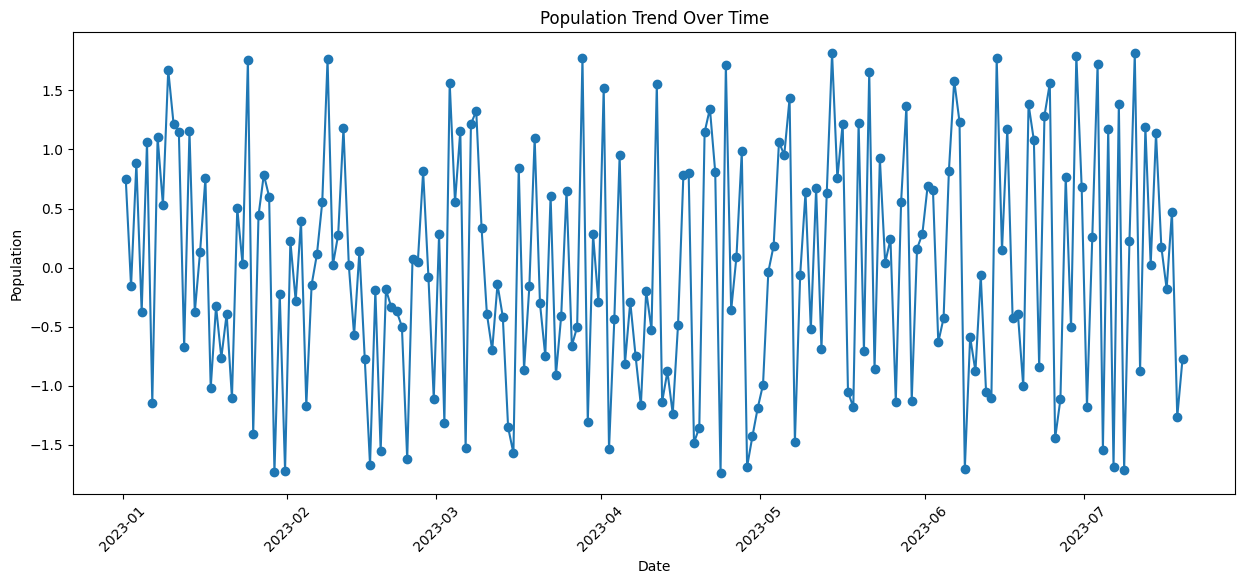

In [29]:
plt.figure(figsize=(15,6))
plt.plot(df['DateTime'], df['Population'], marker='o')
plt.title('Population Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.columns

Index(['Population', 'Temperature', 'DateTime', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'Holiday_No', 'Holiday_Yes', 'Weather_Cloudy', 'Weather_Rainy',
       'Weather_Sunny', 'SpecialEvent_No', 'SpecialEvent_Yes'],
      dtype='object')

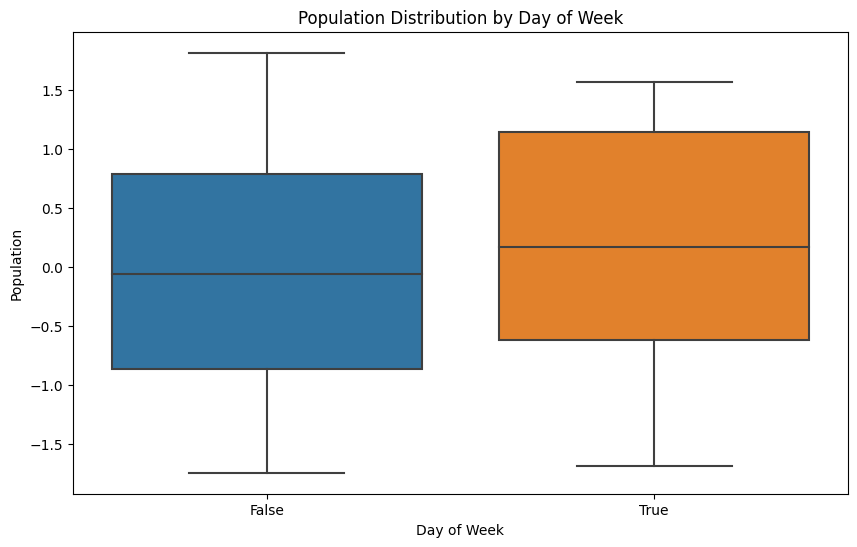

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek_Friday', y='Population', data=df)
plt.title('Population Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Population')
plt.show()

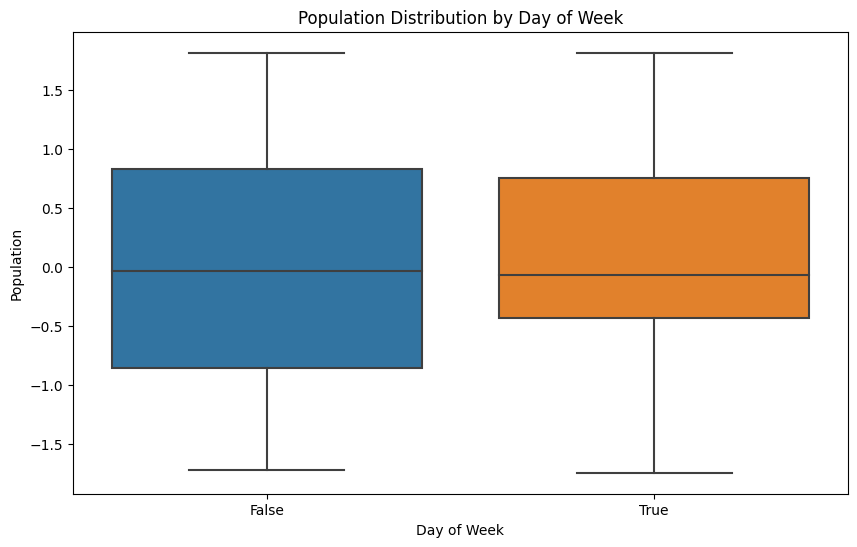

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek_Sunday', y='Population', data=df)
plt.title('Population Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Population')
plt.show()

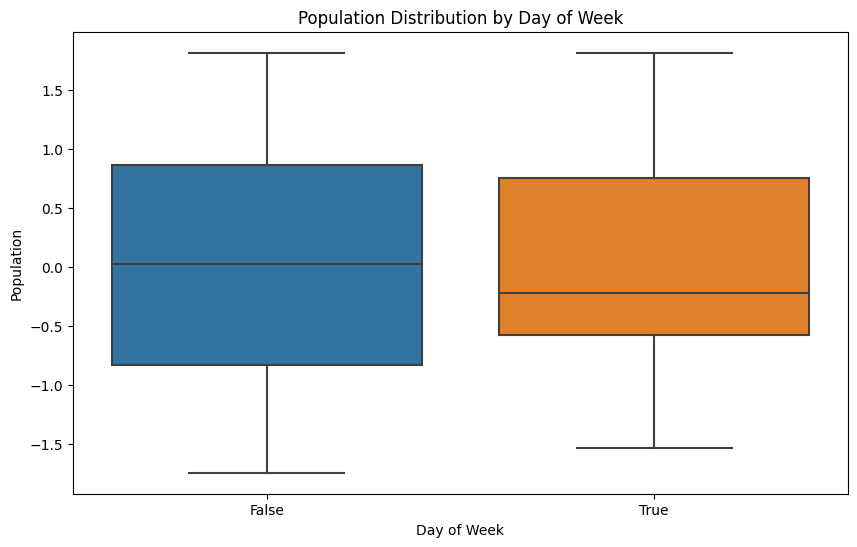

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek_Monday', y='Population', data=df)
plt.title('Population Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Population')
plt.show()

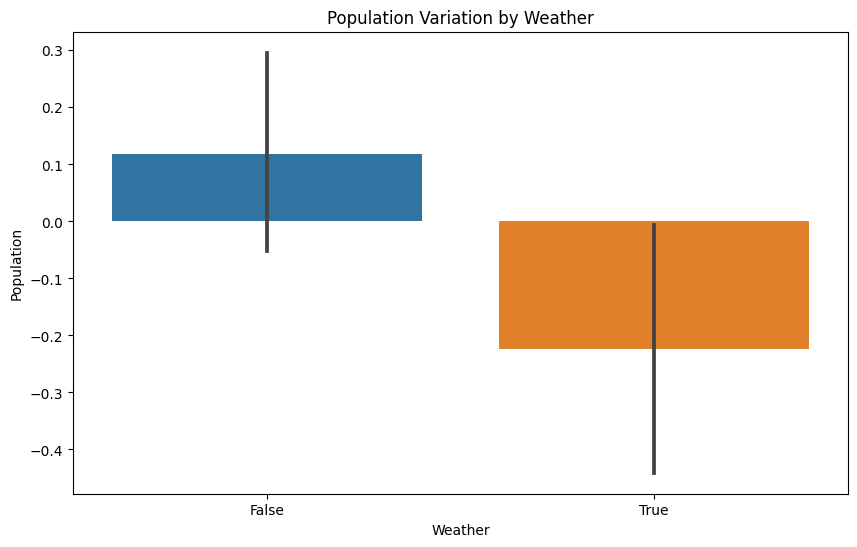

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='Weather_Cloudy', y='Population', data=df)
plt.title('Population Variation by Weather')
plt.xlabel('Weather')
plt.ylabel('Population')
plt.show()

In [35]:
df.columns

Index(['Population', 'Temperature', 'DateTime', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'Holiday_No', 'Holiday_Yes', 'Weather_Cloudy', 'Weather_Rainy',
       'Weather_Sunny', 'SpecialEvent_No', 'SpecialEvent_Yes'],
      dtype='object')

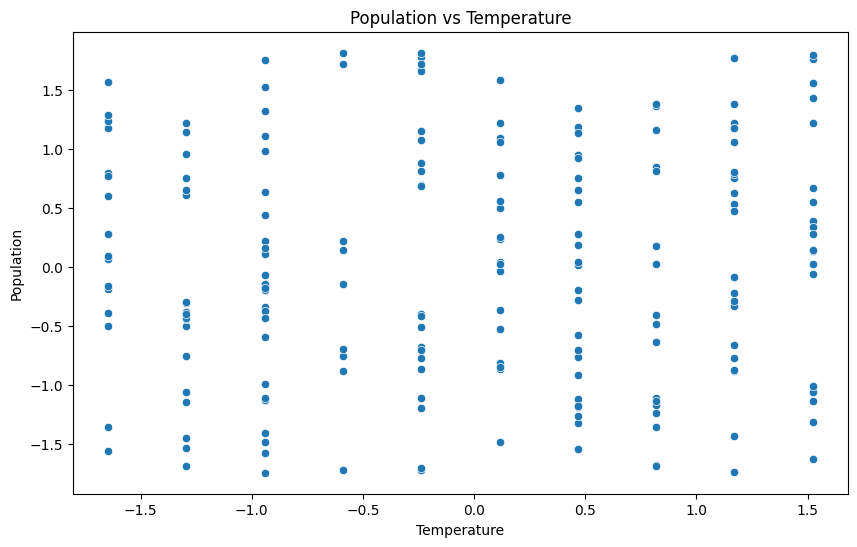

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Population', data=df)
plt.title('Population vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Population')
plt.show()

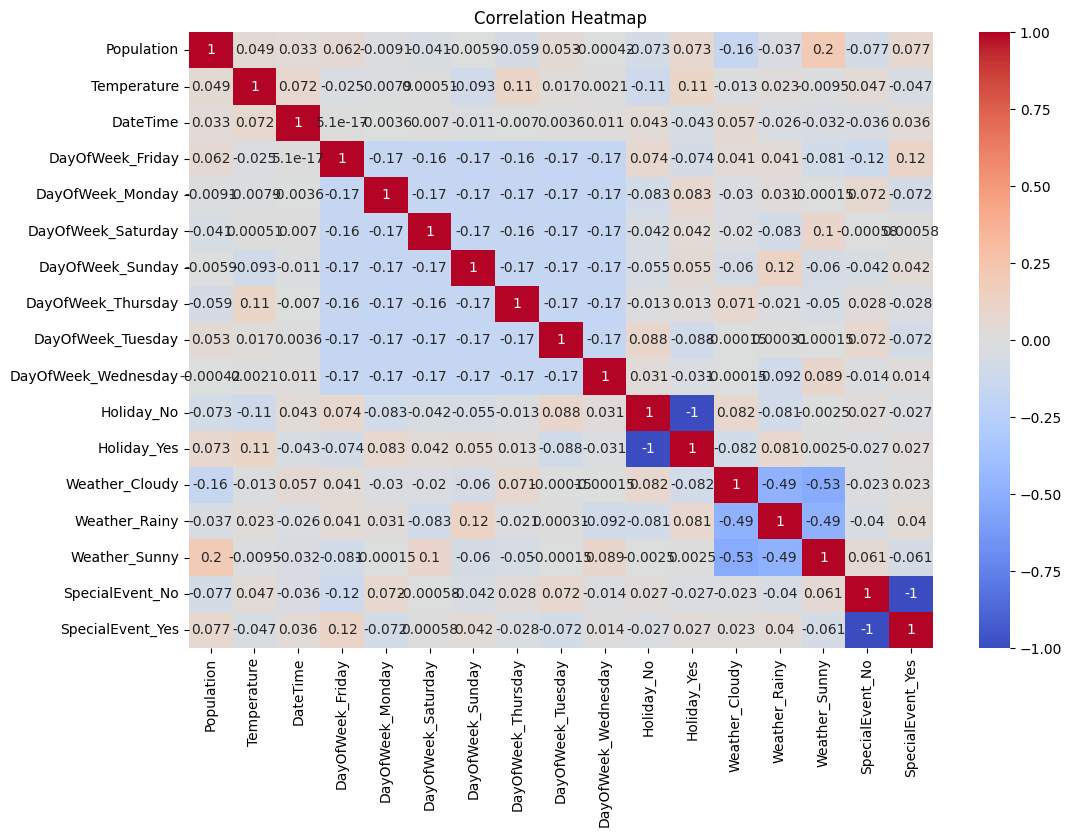

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [39]:
X = df.drop(['Population', 'DateTime'], axis=1)
y = df['Population']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# 예측 및 평가
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE : {mse_linear}')

Linear Regression MSE : 0.9647289400500572


In [43]:
# 모델 초기화 및 훈련
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [44]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE : {mse_rf}')

Random Forest MSE : 1.1455955094232284


In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Population']])

In [46]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [47]:
# 시퀀스 데이터 생성
time_step = 5
X, y = create_dataset(scaled_data, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# LSTM 모델 구축
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [49]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
155/155 [==============================] - 3s 2ms/step - loss: 0.1072
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.0879
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 0.0867
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 0.0848
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 7/100
155/155 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 8/100
155/155 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 9/100
155/155 [==============================] - 1s 3ms/step - loss: 0.0826
Epoch 10/100
155/155 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 11/100
155/155 [==============================] - 1s 3ms/step - loss: 0.0833
Epoch 12/100
155/155 [==============================] - 1s 3ms/step - loss: 0.0874
Epoch 13/100


In [50]:
y_pred_lstm = lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM MSE:{mse_lstm}')

2/2 [==============================] - 1s 3ms/step
LSTM MSE:0.07866331130185675


In [51]:
print(f'Linear Regression MSE : {mse_linear}')
print(f'Random Forest MSE : {mse_rf}')
print(f'LSTM MSE : {mse_lstm}')

Linear Regression MSE : 0.9647289400500572
Random Forest MSE : 1.1455955094232284
LSTM MSE : 0.07866331130185675
